# **Regresión Logística**

## **¿Qué es la Regresión Logística?**

La regresión logística es un algoritmo de **aprendizaje supervisado**. Aunque el nombre sugiere regresión, en realidad es un modelo de clasificación. Su objetivo es encontrar la probabilidad de que una observación pertenezca a una de dos clases.

---

## **Ruta de Implementación de un Modelo de Regresión**

![pipeline](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*CKEc4j27kiRRJFJ-.jpg)

1. **Obtención de datos:** Para este ejemplo se utilizarán datos proporcionados por la librería sklearn, pero se recomienda la siguiente fuente:
   - [**Papers with Code**](https://paperswithcode.com/datasets): Esta página está enfocada en Inteligencia Artificial, debido a ello cuenta con una gran variedad de datos listos para su uso en el ámbito de la inteligencia artificial.
2. **Procesamiento de datos:** Entramos en el proceso de normalización, regularización, segmentación y saneado de datos, en caso de ser necesario.
3. **Entrenamiento del modelo:** Para este punto, se debe haber elegido un modelo acorde a nuestras necesidades dadas por experiencia e intuición para después implementarlo en el entorno requerido.
4. **Evaluación del modelo:** En este punto se evalúa el comportamiento del modelo, comprobando el comportamiento esperado.
5. **Puesta a producción:** Una vez que el modelo cumpla con los requisitos, se puede desplegar en su entorno de producción.
6. **Monitoreo y Mantenimiento:** Se revisita constantemente para evitar pérdidas o ser reentrenado de ser necesario.

_En este documento se enfocará en los puntos del 1 al 4._

---

### **Obtencion de datos**


In [ ]:
# Como se menciono anteriormente usaremos los datos dados por sklearn para este tutorial. 
# Asi que comenzaremos con las importaciones necesarias.

import pandas as pd  # Para manipulacion de datos
import matplotlib.pyplot as plt  # Creacion de graficos
import seaborn as sns  # Complemento de mejora en graficos
from sklearn.datasets import load_iris  # Conjunto de datos

### **Procesamiento de datos**
1. **Visualizacion**

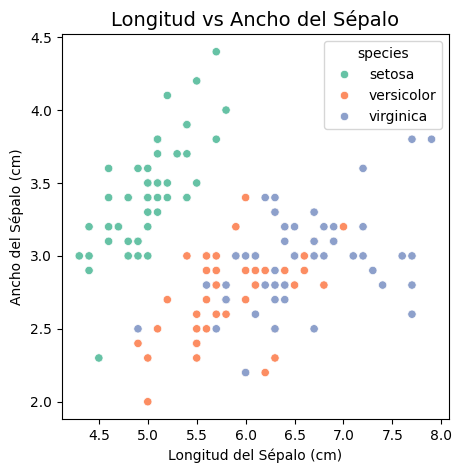

In [25]:
# Carga de datos
iris = load_iris()

# Convertir los datos en un DataFrame de pandas para manipulación más fácil
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadir la columna de etiquetas de clase
iris_data['species'] = iris.target_names[iris.target]

# Graficar un gráfico de dispersión entre las características
plt.figure(figsize=(5, 5))

# Utilizamos seaborn para crear un gráfico de dispersión
sns.scatterplot(data=iris_data, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set2')

# Títulos y etiquetas
plt.title("Longitud vs Ancho del Sépalo", fontsize=14)
plt.xlabel("Longitud del Sépalo (cm)")
plt.ylabel("Ancho del Sépalo (cm)")

# Mostrar el gráfico
plt.show()

2. **Reflexión sobre los datos** \
En este ejemplo, podemos observar cómo para Virginica/Versicolor pertenecen a un mismo grupo. Pero para comprobar este tipo de conjeturas, existe la matriz de dispersión, la cual nos permite ver la relación entre las variables y determinar si influye o no en el resultado final.

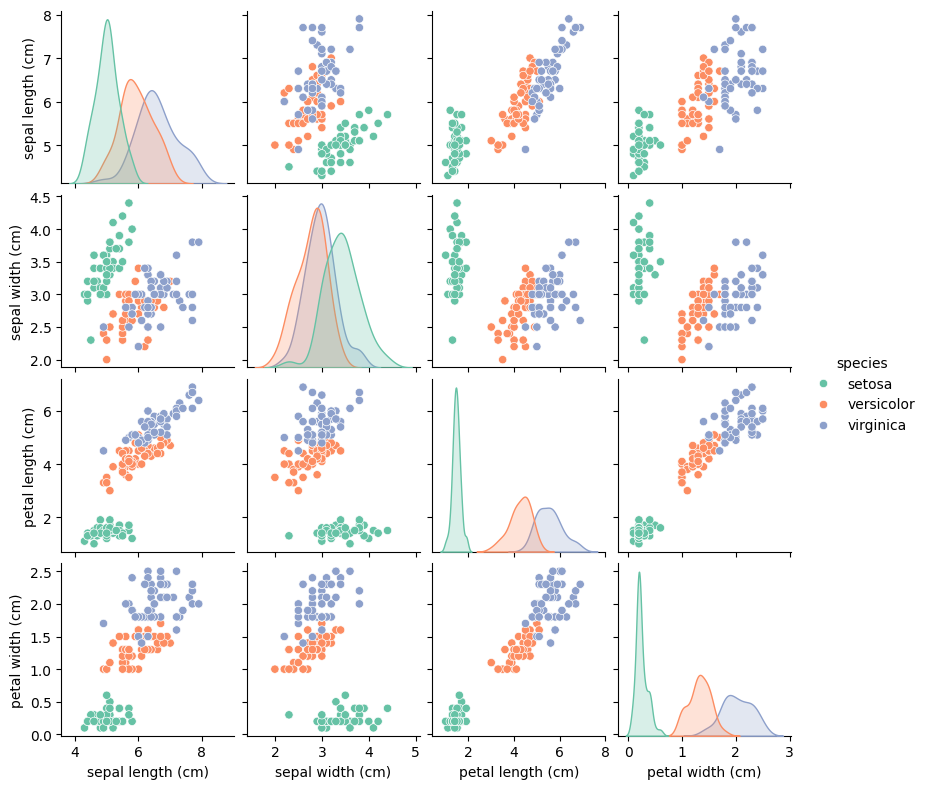

In [ ]:
# 2. Matriz de dispersión (Pairplot) para visualizar relaciones entre todas las características
sns.pairplot(iris_data, hue='species', palette='Set2',height=1.5)

# Mostrar el gráfico
plt.show()

Aquí podemos observar que el valor de la longitud del sépalo realmente aporta muy poco en el **clustering** de las variables, por lo que podríamos optar por extraerlo de los datos.  
Para este ejemplo, esto no es muy relevante, así que pasaremos a lo siguiente. \
En este paso, ya evaluados los datos, podemos decidir nuestro modelo de clasificación. Aquí, podemos ver una división en las etiquetas, específicamente entre **setosa** y **versicolor/virginica**. Por lo tanto, podemos optar por un modelo lineal como la **regresión logística**.

3. **Segmentación de datos**

In [ ]:
# 3. Segmentacion de datos
import numpy as np  # Para operaciones numericas
from sklearn.model_selection import (
    train_test_split,
)  # Funcion para segmentacion de datos

data = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)

X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

4. **Normalizacion**

In [37]:
# Normalizacion de datos
from sklearn.preprocessing import StandardScaler # Funcion para normalizacion de datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Entrenamiento del modelo**

Ya que decidimos usar la regression logistica debemos construir el modelo.

#### **Construccion del modelo**

1. **Función Sigmoide**

La regresión logística se basa en la **función sigmoide**, que mapea cualquier valor real a un rango entre 0 y 1, ideal para representar probabilidades.

$$\left[ \sigma(z) = \frac{1}{1 + e^{-z}} \right]$$

Donde:

- $\left( z = W^T X \right)$ → Producto escalar entre el vector de características $\left( X \right)$ y el vector de pesos $\left( W \right)$.
- $\left( \sigma(z) \right)$ → Probabilidad de pertenecer a la clase positiva.

---

2. **Función de Verosimilitud**

La función de verosimilitud mide la probabilidad de observar los datos actuales dados unos parámetros $\left( W \right)$.

$$\left[ L(W) = \prod\_{i=1}^{n} \sigma(W^T X_i)^{y_i} (1 - \sigma(W^T X_i))^{1 - y_i} \right]$$

Donde:

- $\left( y_i \right)$ → Etiqueta de la muestra $\left( i \right)$ (0 o 1).
- $\left( \sigma(W^T X_i) \right)$ → Probabilidad de pertenecer a la clase positiva.

Para facilitar la derivación, aplicamos el **logaritmo natural**:

$$\left[ \ell(W) = \log L(W) = \sum\_{i=1}^{n} \left[ y_i \log \sigma(W^T X_i) + (1 - y_i) \log(1 - \sigma(W^T X_i)) \right] \right]$$

3. **Función de Pérdida: Cross-Entropy**

La **cross-entropy** mide la distancia entre las predicciones del modelo y las etiquetas reales.

$$\left[ J(W) = -\frac{1}{n} \sum\_{i=1}^{n} \left[ y_i \log(\sigma(W^T X_i)) + (1 - y_i) \log(1 - \sigma(W^T X_i)) \right] \right]$$

El objetivo es minimizar esta función durante el entrenamiento.

---

4.  **Derivaciónes**

    1. Derivada del Logaritmo de la Verosimilitud

       Para encontrar el valor óptimo de los pesos $\left( W \right)$, calculamos la **derivada parcial** de la log-verosimilitud respecto a $\left( W \right)$:

       $$\left[ \ell(W) = \sum\_{i=1}^{n} \left[ y_i \log(\sigma(W^T X_i)) + (1 - y_i) \log(1 - \sigma(W^T X_i)) \right] \right]$$

    2. Derivada parcial del primer término:
       $$\left[ \frac{\partial}{\partial W} \sum\_{i=1}^{n} y_i \log(\sigma(W^T X_i)) \right]$$

       Usamos la regla de la cadena:
       $$\left[ \frac{\partial}{\partial W} \log(\sigma) = \frac{1}{\sigma} \cdot \frac{\partial \sigma}{\partial W} \right]$$

       Derivada de la función sigmoide:
       $$\left[ \frac{\partial \sigma}{\partial W} = \sigma(1 - \sigma) X_i \right]$$

       Por lo tanto:
       $$\left[ \frac{\partial}{\partial W} y_i \log(\sigma) = y_i \frac{1}{\sigma} \cdot \sigma(1 - \sigma) X_i = y_i (1 - \sigma) X_i \right]$$

    3. Derivada parcial del segundo término:
       $$\left[ \frac{\partial}{\partial W} \sum\_{i=1}^{n} (1 - y_i) \log(1 - \sigma(W^T X_i)) \right]$$

    Usamos la regla de la cadena nuevamente:
    $$\left[ \frac{\partial}{\partial W} \log(1 - \sigma) = \frac{-1}{1 - \sigma} \cdot \frac{\partial \sigma}{\partial W} \right]$$

    $$\left[ = \frac{-1}{1 - \sigma} \cdot \sigma(1 - \sigma) X_i = -\sigma X_i \right]$$

    Por lo tanto:

    $$\left[ \frac{\partial}{\partial W} (1 - y_i) \log(1 - \sigma) = - (1 - y_i) \sigma X_i \right]$$

    4.  Gradiente completo:
        Juntando ambas partes:
        $$\left[ \frac{\partial \ell(W)}{\partial W} = \sum\_{i=1}^{n} X_i \left( y_i - \sigma(W^T X_i) \right) \right]$$

5.  **Algoritmo de Gradiente Descendente**

Usamos **gradiente descendente** para minimizar la función de pérdida:

$$\left[ W^{(t+1)} = W^{(t)} + \alpha \sum_{i=1}^{n} X_i \left( y_i - \sigma(W^T X_i) \right) \right]$$

Donde:

- $\left( \alpha \right)$ → Tasa de aprendizaje.
- $\left ( t \right)$ → Iteración actual.

#### **Implementacion del modelo**

una ves creado, de manera logica procedamos a la implementacion


In [44]:
from sklearn.linear_model import LogisticRegression # Modelo de regresion

# Metodo de resolucion SAGA con un numero maximo de interacciones de 200
lr_model = LogisticRegression(solver='saga', max_iter=200)
lr_model.fit(X_train_scaled, y_train)

# realizamos predicciones con los datos de prueba
y_pred = lr_model.predict(X_test_scaled)

### **Evaluación del modelo**

Por último, veamos los resultados ofrecidos por el modelo. Para ello, utilizaremos varias métricas de sklearn que nos permitirán ver el rendimiento modelo.

- **Precisión**: Con ella podemos ver la proporción de predicciones correctas sobre el total de predicciones realizadas.

- **Matriz de Confusión**: Nos proporciona una tabla que nos muestra la cantidad de aciertos y errores del modelo.

- **Reporte de Clasificación**: Genera un informe detallado con las siguientes métricas:
  - **Precisión**: Mide la capacidad del modelo para clasificar correctamente las instancias positivas (falsos positivos bajos).
  - **Recall (sensibilidad o exhaustividad)**: Indica cuántas de las instancias positivas reales fueron correctamente identificadas por el modelo.
  - **F1-Score**: Es la media armónica entre precisión y recall. Se utiliza cuando hay un desbalance en las clases.

- **Visualización de la Matriz de Confusión**: Presenta de manera gráfica la matriz de confusión, lo que permite entender rápidamente el desempeño del modelo, identificando visualmente las clases bien predichas y las que necesitan mejorar.

Con estas métricas, podemos evaluar y ajustar el rendimiento del modelo, y tomar decisiones sobre su efectividad en tareas de clasificación.


Accuracy: 1.00

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



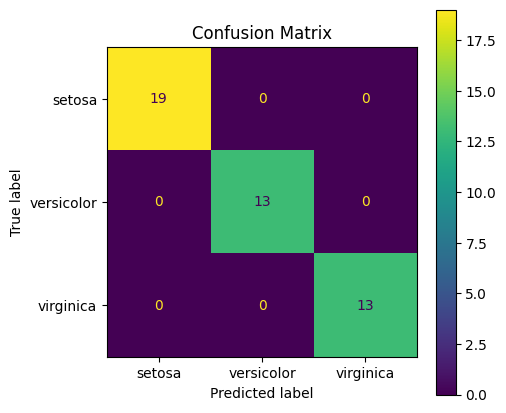

In [47]:
# Importar las métricas necesarias para la evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay 

# Calcular la precisión (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred) 

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred) 

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred)  # Genera un resumen con métricas como precisión, recall y f1-score para cada clase

print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report) 

# Visualizar la matriz de confusión utilizando un gráfico
fig, ax = plt.subplots(figsize=(5, 5)) 
ConfusionMatrixDisplay(conf_matrix, display_labels=iris.target_names).plot(ax=ax) 
plt.title('Confusion Matrix') 
plt.show() 
